In [18]:
import torch          # PyTorch
import numpy as np    # Numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Import a simple LIF feedforward cell
from norse.torch.module.lif import LIFFeedForwardCell
from norse.torch.functional.lif import LIFParameters, LIFState

In [19]:
# This function creates a train of spikes at steps first_t*2^0, first_t*2^1 ... first_t*2^n
def create_spikes(s_a, first_t, nb_steps):
    i_spikes = []
    next_spike = first_t
    for i in range(0,int(nb_steps)):
        if i == next_spike:
            next_spike = next_spike * 2
            i_spikes.append(s_a)
        else:
            i_spikes.append(0)
    return i_spikes

In [20]:
def get_spiking_times(spikes):
    spike_data = []
    try:
        for i in range(0,len(spikes)):
            if spikes[i]>0:
                spike_data.append(i)
    except:
        pass
    return spike_data

In [21]:
# Timestep and Sim Duration in seconds
dt = 0.001
sim_duration = 2 
nb_steps = int(sim_duration/dt)

In [29]:
# Cell parameters
p=LIFParameters(tau_syn_inv=torch.tensor(1000/5.0),
                tau_mem_inv=torch.tensor(1000/20.0), 
                v_leak=torch.tensor(-65.0),
                v_th=torch.tensor(-50.0),
                v_reset=torch.tensor(-65.0), 
                method='super',
                alpha=torch.tensor(0.))


lif_cell = LIFFeedForwardCell(p, dt)


A train of spikes is created and used as input for a neuron in the default bio initial state

In [61]:
neuron_state = LIFState(z=0.0, v=-65.0, i=0.0)
s_a = 1 # spike value?!?!?
first_t = 200 # step at which first spike occurs
i_spikes = create_spikes(s_a, first_t, nb_steps) # input spikes

v = [] # voltages
o_spikes = [] # output spikes
    

for i_s in i_spikes:
    out, neuron_state = lif_cell(i_s, neuron_state)
    o_spikes.append(out.detach().numpy())
    v.append(float(neuron_state.v))

# Get output spikes' data
o_spikes = np.array(o_spikes)

print("\n\n\n*********** v max = %0.3f *********** \n\n\n" %(max(v)))


np.savetxt("v_norse.csv", np.array(v), delimiter=",")




*********** v max = -64.835 *********** 





In [62]:
# Get spike times
i_spike_data = get_spiking_times(i_spikes)      
o_spike_data = get_spiking_times(o_spikes)

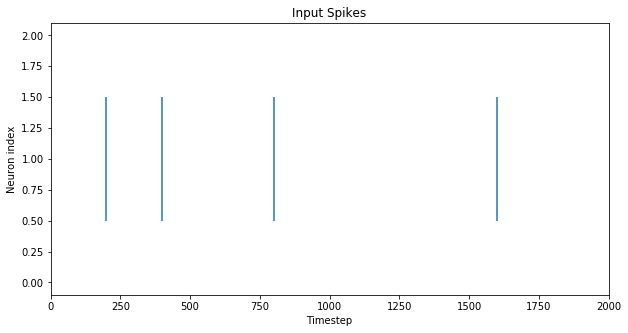

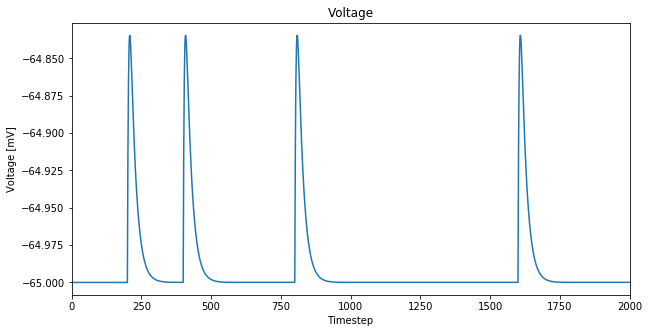

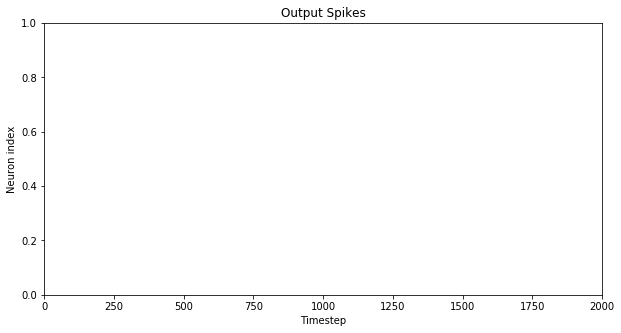

In [63]:
 
# Plotting input spikes
plt.figure(figsize=(10, 5))  # Set figure size 
plt.title('Input Spikes')
plt.xlabel("Timestep")        # Label x axis
plt.ylabel("Neuron index")    # Label y axis
plt.xlim(0,nb_steps)
plt.eventplot(i_spike_data) # Plot the timesteps where the neuron spiked

# Plotting Voltage
plt.figure(figsize=(10, 5))  # Set figure size 
plt.title('Voltage')
plt.xlabel("Timestep")        # Label x axis
plt.ylabel("Voltage [mV]")    # Label y axis
plt.xlim(0,nb_steps)
plt.plot(v)

# Plotting output spikes
plt.figure(figsize=(10, 5))  # Set figure size 
plt.title('Output Spikes')
plt.xlabel("Timestep")        # Label x axis
plt.ylabel("Neuron index")    # Label y axis
plt.xlim(0,nb_steps)
plt.eventplot(o_spike_data) # Plot the timesteps where the neuron spiked
